In [16]:
### subroutine to plot the model as a grid
import matplotlib.pyplot as plt

def plot_grid(name):
    plt.rcParams['figure.figsize'] = [4,4]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(name)

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.3)
    plt.show()
    return

In [17]:
## 
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
import math
##############################################################  setup
m = 100 #years

n= 6 ## number of grid points is n*n

ocean=np.array([14/255,0/255,117/255])   
shallowocean =np.array([116/255,132/255,252/255])
glacier=np.array([191/255,232/255,255/255]) ## ice on land (glacier)
icefloat=np.array([0.9,0.9,1])  ## sea ice  
land=np.array([0/255,122/255,65/255]) 
lowland=np.array([255/255,210/255,150/255])
destroyedland=np.array([1,0,0]) # for later

geography={'ocean':ocean,'shallowocean':shallowocean,'glacier':glacier,'icefloat':icefloat,\
      'land':land,'lowland':lowland}

######################################  initiaize model (geography)
background=[[land]*n]*n
grid_colours=background.copy()
clim_model=np.array(grid_colours)  ## initializes the model to all land
print(clim_model)

#clim_model[1,2]=shallowocean
#clim_model[2,0]=glacier
#clim_model[2,2]=lowland



######################################  initialize temperature

#init_temperature=np.array([[0]*n]*n)
#print("initial temperature anomaly:\n", init_temperature)

##### values from NOAA 
## https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/ocean/ytd/12/1850-2022
## uses average annual anomaly change from 1981-2022
land_temp_inc = 0.027 #average annual land temp increase 
ocean_temp_inc = 0.0093 #average annual ocean temp increase 




######################################  plot
#plot_grid(clim_model)


[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.254

In [3]:
### land temperature change over time 
### would like to make temp inc double after 100 years 
'''land_temp_over_time=[]
land_temp_over_time.append(init_temperature)
t = 100
land_temp = init_temperature
for i in range(t):
    land_temp = land_temp+[[land_temp_inc]*n]
    land_temp_over_time.append(land_temp)

land_temp'''

'land_temp_over_time=[]\nland_temp_over_time.append(init_temperature)\nt = 100\nland_temp = init_temperature\nfor i in range(t):\n    land_temp = land_temp+[[land_temp_inc]*n]\n    land_temp_over_time.append(land_temp)\n\nland_temp'

In [4]:
### ocean temperature change over time 
'''ocean_temp_over_time=[]
ocean_temp_over_time.append(init_temperature)
t = 100
ocean_temp = init_temperature
for i in range(t):
    ocean_temp = ocean_temp+[[ocean_temp_inc]*n]
    ocean_temp_over_time.append(ocean_temp)

ocean_temp'''

'ocean_temp_over_time=[]\nocean_temp_over_time.append(init_temperature)\nt = 100\nocean_temp = init_temperature\nfor i in range(t):\n    ocean_temp = ocean_temp+[[ocean_temp_inc]*n]\n    ocean_temp_over_time.append(ocean_temp)\n\nocean_temp'

In [18]:
## Keeling Curve, CO2 ppm
init_CO2 = 307.08
CO2_ppm_over_time=[]
def CO2(t):
    for i in range(t):
        CO2_ppm = init_CO2*math.exp(0.0045*i)
        CO2_ppm_over_time.append(CO2_ppm)
    return CO2_ppm_over_time

In [68]:
## Temp Inc Due to GHG
## Data rom 1900 to 2005, 
# https://data.giss.nasa.gov/modelforce/Marvel_etal_2016/
init_GHGtemp = 0
GHGtemp_over_time=[]
GHGtemp_over_time.append(init_GHGtemp)
def GHG_effect(t):
    for i in range(1,t):
        GHG_temp = 0.1077*math.exp(0.0234*i)
        GHGtemp_over_time.append(GHG_temp)
    return GHGtemp_over_time

GHG_temp = GHG_effect(m)

In [67]:
## Temp Inc Due to combined solar and volcanic activity
## Data rom 1900 to 2005, 
# https://data.giss.nasa.gov/modelforce/Marvel_etal_2016/
init_nat_temp = 0
nattemp_over_time=[]
nattemp_over_time.append(init_nat_temp)
def natural_effect(t):
    i = 1
    while i<100:
        natural_temp = (2.788e-10)*(i**5)-3.017e-8*(i**4)-1.161e-6*(i**3)+0.0001648*(i**2)-0.002152*i
        nattemp_over_time.append(natural_temp)
        i = i + 1
    if t>100: # if t is greater than 100, the list begins to repeat itself
        nattemp_over_time.extend(nattemp_over_time[1:t-100])
    return nattemp_over_time
    
nat_temp = natural_effect(m)

In [8]:
# hypothetical precipitation data
precip_init = 0
precip_over_time = []
precip_over_time.append(precip_init)
def precip(t):
    for i in range(t):
        precip_amt = np.sin(2*i)-2*np.cos(0.7*i)-0.35
        precip_over_time.append(precip_amt)
    return precip_over_time

def precip_intensity(t):
    precip(t)
    intensity_sum = [0]*(len(precip_over_time))
    for i in range(len(precip_over_time)):
        intensity_sum[i] = intensity_sum[i-1] + precip_over_time[i]
    return intensity_sum

precip_int = precip_intensity(m)

In [52]:
##### turning lists into matrices
## GHG Temperature Anomaly Contribution 
GHG_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            GHG_matrix_over_time[i,j,t] = GHG_temp[t]

## Natural Temperature Anomaly Contribution
nat_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            nat_matrix_over_time[i,j,t] = nat_temp[t]

## Precipitation Intensity
precip_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            precip_matrix_over_time[i,j,t] = precip_int[t]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [59]:
def what_is(x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(clim_model[x,y]==np.array(v)):
            whatis=k
    return whatis

print(what_is(3,2))
print(what_is(1,2))
print(what_is(3,3))

lowland
lowland
lowland
100
[[-34.49001337 -34.49001337 -34.49001337 -34.49001337 -34.49001337]
 [-34.49001337 -34.49001337 -34.49001337 -34.49001337 -34.49001337]
 [-34.49001337 -34.49001337 -34.49001337 -34.49001337 -34.49001337]
 [-34.49001337 -34.49001337 -34.49001337 -34.49001337 -34.49001337]
 [-34.49001337 -34.49001337 -34.49001337 -34.49001337 -34.49001337]]
[[1.12108208 1.12108208 1.12108208 1.12108208 1.12108208]
 [1.12108208 1.12108208 1.12108208 1.12108208 1.12108208]
 [1.12108208 1.12108208 1.12108208 1.12108208 1.12108208]
 [1.12108208 1.12108208 1.12108208 1.12108208 1.12108208]
 [1.12108208 1.12108208 1.12108208 1.12108208 1.12108208]]


land


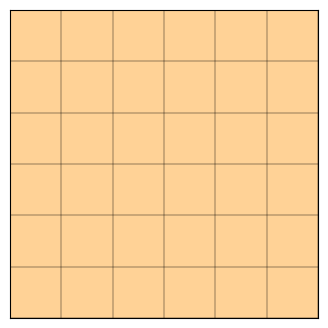

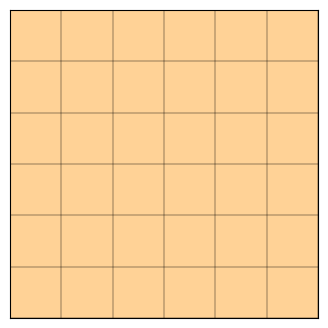

In [66]:
clim_model=np.array(grid_colours)  ## initializes the model to all land
model_over_time=[]
model_over_time.append(clim_model)
print(what_is(2,2))

for t in range(m):
    for i in range(n):
        for j in range(n):
            g=what_is(i,j)
            if g=='land':
                if precip_matrix_over_time[i,j,t] < -10 and GHG_matrix_over_time[i,j,t]+nat_matrix_over_time[i,j,t] > 1: # and random.random_sample() > 0
                    clim_model[i,j] = destroyedland
                else:
                    clim_model[i,j] = lowland
            elif g=='ocean':
                clim_model[i,j]=shallowocean
    model_over_time.append(clim_model)
plot_grid(model_over_time[0])

plot_grid(model_over_time[99])
##########  plotting
#fig, ax = plt.subplots()
#ax.imshow(model_over_time[99])

# Set ticks and labels (not really needed)
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
# add grid lines  
ax.grid(color='black', linewidth=0.3)
plt.show()            
    